In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_jpeg_files():
    os.getcwd()
    os.listdir()
    path=os.getcwd()
    jpg_files=[f for f in os.listdir(path) if f.endswith('jpg')]
    return jpg_files
get_jpeg_files()

['1.jpg',
 '2.jpg',
 '3.jpg',
 'cameraman.jpg',
 'image_gray.jpg',
 'image_gray_bw.jpg',
 'penguen.jpg']

In [3]:
def display_two_image(im_1,im_2):
    plt.subplot(1,2,1)
    plt.imshow(image_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2)
    plt.show()
def rotate_by_i_j_swap(im_1):
    m,n,k=im_1.shape
    new_image=np.zeros((n,m,k),dtype='uint8')
    for i in range(m):
        for j in range(n):
            temp=image_1[i,j]
            new_image[j,i]=temp
    return new_image

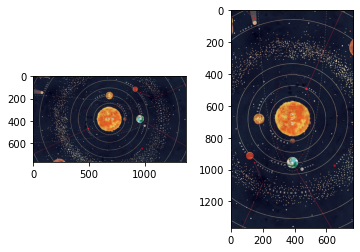

In [7]:
image_1=plt.imread('2.jpg')
image_2=rotate_by_i_j_swap(image_1)
display_two_image(image_1,image_2)

In [13]:
def rotate_one_point_with_theta_counterclockwise(point,angle):
    '''
    point: a pair of x,y indicating the location of the pixel
    angle: angle in degrees
    '''
    theta=np.radians(angle) #convert angles to radians
    r=np.array(((np.cos(theta) , -np.sin(theta)), (np.sin(theta), np.cos(theta)))) #rotation matrix
    v=np.array(point)
    return r.dot(v).astype(int)

def get_all_new_location(im_1,angle):
    m,n,k=im_1.shape
    new_location_points=[]
    for i in range(m):
        for j in range(n):
            new_location_points.append(rotate_one_point_with_theta_counterclockwise([i,j],angle))
    return new_location_points  
def get_min_max(new_location_points):
    min_x,min_y=new_location_points[0][0],new_location_points[0][1]
    max_x,max_y=new_location_points[0][0],new_location_points[0][1]
    s1=len(new_location_points)
    for s in range(s1):
        if min_x>new_location_points[s][0]:
            min_x=new_location_points[s][0]
        if max_x<new_location_points[s][0]:
            max_x=new_location_points[s][0]
        if min_y>new_location_points[s][1]:
            min_y=new_location_points[s][1]
        if max_y<new_location_points[s][1]:
            max_y=new_location_points[s][1]
        
    return min_x,min_y,max_x,max_y

In [14]:
new_location_points= get_all_new_location(image_1,90)
min_x,min_y,max_x,max_y=get_min_max(new_location_points)
rotate_one_point_with_theta_counterclockwise([0,1],90)

array([-1,  0])

In [15]:
def rotate_an_image(im_1,angle):
    m,n,k=im_1.shape
    new_location_points=get_all_new_location(im_1,angle)
    min_x,min_y,max_x,max_y=get_min_max(new_location_points)
    new_m=max_x-min_x+1
    new_n=max_y-min_y+1
    x_offset=0-min_x
    y_offset=0-min_y
    
    new_image_2=np.zeros((new_m,new_n,3),dtype='uint8')
    for i in range(m):
        for j in range(n):
            new_i,new_j=rotate_one_point_with_theta_counterclockwise([i,j],angle)
            new_image_2[new_i+x_offset,new_j+y_offset]=image_1[i,j]
    return new_image_2

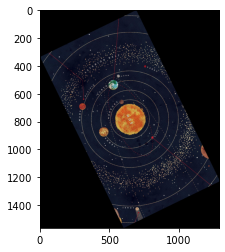

In [16]:
i_1=rotate_an_image(image_1,116)
plt.imshow(i_1)
plt.show()

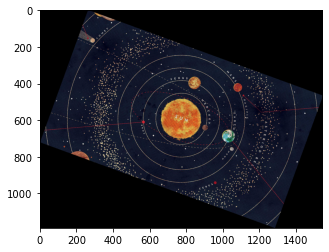

In [17]:
i_1=rotate_an_image(image_1,-20)
plt.imshow(i_1)
plt.show()